# Redes Neurais: Problemas de Classificacao

Autores: 
 - Arthur Vinicius Santos Silva
 - Lucas da Silva Santos

## Lendo as bibliotecas

In [89]:
# criar pyenv
!python3 -m venv dsclassificacao
!source dsclassificacao

zsh:source:1: arquivo ou diretório inexistente: dsclassificacao


In [90]:
%pip install tensorflow scikit-learn numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
pd.set_option('display.max_columns', 25)

In [93]:
# Define a semente
seed_value = 2023
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Atividade

1. **(Sem Nota)** Drug 200: problema multiclasse. A base drug200.csv contém dados de saúde paciente dos pacientes e, baseado nisso, recomenda-se tomar um repectivo remédio condito na coluna Drug. Note que há 05 respostas diferentes (problema multiclasse). Portanto, sua última camada será construída como:
```
# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(5, activation='softmax'))
#O valor 5 é porque vamos retornar apenas 1 output nessa camada de saída.
```
**Lembrete**: transforme cada opção num número de 1 a 5.



2. **(Com Nota)** Mushroom: problema binário. A base mushrooms.csv contém dados de **duas** espécies de cogumelos. A base está completamente criptografada e não há um dicionário.

**Projeto**:
* Testem diferentes arquiteturas para responder a esses problemas;
* Testem diferentes otimizadores;
* Dependendo da função de perda, adaptem o learning rate.

**Entrega:**
Realizem a predição da base mushrooms_AC.csv e salvem no drive da respectiva AC. Usem como nome do arquivo NOME_SOBRENOME_NOME2_SOBRENOME2.csv . Utilizem o formato padrão do pandas para exportar o arquivo.

A métrica para avaliar será a **acurácia**.

# Binário

In [94]:
df_mushroom = pd.read_csv('./mushrooms.csv')
df_mushroom.tail()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
7495,x,y,e,t,n,f,c,b,w,t,b,s,s,g,p,p,w,o,p,n,v,d,e
7496,f,s,n,f,f,f,c,n,b,t,?,s,s,w,p,p,w,o,e,w,v,l,p
7497,x,f,g,f,n,f,w,b,n,t,e,s,s,w,w,p,w,o,e,n,s,g,e
7498,x,s,n,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,n,v,g,p
7499,x,s,n,t,p,f,c,n,w,e,e,s,s,w,w,p,w,o,p,k,s,u,p


In [95]:
df_mushroom.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

In [96]:
for coluna in df_mushroom.columns:

    print(f"valores da coluna {coluna}")
    print(df_mushroom[coluna].value_counts())
    print("\n")

valores da coluna cap-shape
cap-shape
x    3369
f    2909
k     771
b     417
s      30
c       4
Name: count, dtype: int64


valores da coluna cap-surface
cap-surface
y    2995
s    2352
f    2149
g       4
Name: count, dtype: int64


valores da coluna cap-color
cap-color
n    2117
g    1693
e    1387
y     986
w     961
b     153
p     138
c      38
r      14
u      13
Name: count, dtype: int64


valores da coluna bruises
bruises
f    4382
t    3118
Name: count, dtype: int64


valores da coluna odor
odor
n    3260
f    1979
y     539
s     531
a     373
l     367
p     241
c     178
m      32
Name: count, dtype: int64


valores da coluna gill-attachment
gill-attachment
f    7308
a     192
Name: count, dtype: int64


valores da coluna gill-spacing
gill-spacing
c    6288
w    1212
Name: count, dtype: int64


valores da coluna gill-size
gill-size
b    5172
n    2328
Name: count, dtype: int64


valores da coluna gill-color
gill-color
b    1597
p    1377
w    1124
n     973
g     685
h   

In [97]:
df_mushroom_validacao = pd.read_csv('./mushrooms_AC.csv')


In [98]:
df_mushroom_validacao.columns

Index(['Unnamed: 0', 'index', 'cap-shape', 'cap-surface', 'cap-color',
       'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
       'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [99]:
df_mushroom_validacao.tail()

,Unnamed: 0,index,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
619,619,4123,f,f,y,f,f,f,c,b,h,e,b,k,k,n,p,p,w,o,l,h,v,g
620,620,6993,f,s,e,f,y,f,c,n,b,t,?,k,k,p,p,p,w,o,e,w,v,d
621,621,246,x,s,w,t,l,f,w,n,p,t,b,s,s,w,w,p,w,o,p,u,v,d
622,622,7935,k,y,e,f,y,f,c,n,b,t,?,k,s,w,w,p,w,o,e,w,v,d
623,623,3018,f,y,e,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,n,v,d


In [100]:
df_mushroom['class'].unique()

array(['e', 'p'], dtype=object)

In [101]:
len(df_mushroom)

7500

In [102]:
dict(df_mushroom['class'].value_counts())

{'e': 3885, 'p': 3615}

In [103]:
df_mushroom_dummies = pd.get_dummies(df_mushroom, columns = list(df_mushroom.columns), dtype=float,drop_first=True)

ID = df_mushroom_validacao.index

df_mushroom_validacao_ajustada = df_mushroom_validacao.drop(columns=['index', "Unnamed: 0"])

df_mushroom_validacao_dummies = pd.get_dummies(df_mushroom_validacao_ajustada, columns = list(df_mushroom_validacao_ajustada.columns), dtype=float,drop_first=True)

In [104]:
df_mushroom_dummies.tail()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,...,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class_p
7495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7496,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7498,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7499,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [105]:
X = df_mushroom_dummies.drop(columns = ['class_p'])
y = df_mushroom_dummies.class_p
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023,stratify=y)
X_val = df_mushroom_validacao_dummies
ID = X_val.index

#Com o parametro stratify, a divisao das bases mantera uma qt equilibrada de M e F

In [106]:
print(f" Treino {len(X_train)}, Teste {len(X_test)}, Validacao {len(df_mushroom_validacao_dummies)}")

 Treino 5250, Teste 2250, Validacao 624


## Identifica colunas diferentes na base de validação e de teste

In [107]:
colunas_diferentes = X_train.columns.difference(X_val.columns)

X_train = X_train.drop(columns=colunas_diferentes)
X_test = X_test.drop(columns=colunas_diferentes)

## Criando modelos e realizando treinamento

* Early Stopping

In [108]:
# Incluindo early stopping

# Defina o callback EarlyStopping
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='loss',  # Métrica a ser monitorada
    patience=50,          # Número de épocas sem melhoria antes de parar o treinamento
    restore_best_weights=True  # Restaura os melhores pesos encontrados durante o treinamento
)

* Learning Rate

In [109]:
# Definindo a função para agendar o learning rate
def lr_scheduler(epoch):
    if epoch < 50:
        return 0.005
    elif epoch < 100:
        return 0.001
    elif epoch < 150:
        return 0.0005
    else:
        return 0.0001

# Criando o callback para o Learning Rate Scheduler
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

# Optei por alterar o learning rate a cada 50 epocas,
# pois o early stop vai encerrar o treinamento quando 50 epocas se passarem sem melhorar o modelo.

Lembrete: esses parâmetros (early stopping e learning rate) são utilizados como callbacks:



```
# Treinando o modelo
model.fit(X_train, y_train, epochs=200, batch_size=16, callbacks=[lr_scheduler_callback,early_stopping_callback])
```



### Otimizador: SGD

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/SGD)

In [110]:
# Crie o modelo sequencial
model1 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model1.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model1.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model1.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model1.compile(optimizer=tf.keras.optimizers.SGD(), loss='binary_crossentropy', metrics=['accuracy'])

In [111]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 128)               11648     
                                                                 
 dense_49 (Dense)            (None, 256)               33024     
                                                                 
 dense_50 (Dense)            (None, 512)               131584    
                                                                 
 dense_51 (Dense)            (None, 512)               262656    
                                                                 
 dense_52 (Dense)            (None, 256)               131328    
                                                                 
 dense_53 (Dense)            (None, 128)               32896     
                                                                 
 dense_54 (Dense)            (None, 64)               

In [112]:
history1 = model1.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )

Epoch 1/200


3/3 [==============================] - 1s 84ms/step - loss: 0.6929 - accuracy: 0.5219 - val_loss: 0.6923 - val_accuracy: 0.5187 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 34ms/step - loss: 0.6924 - accuracy: 0.5242 - val_loss: 0.6918 - val_accuracy: 0.5209 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 33ms/step - loss: 0.6919 - accuracy: 0.5257 - val_loss: 0.6913 - val_accuracy: 0.5213 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 37ms/step - loss: 0.6914 - accuracy: 0.5272 - val_loss: 0.6908 - val_accuracy: 0.5222 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 31ms/step - loss: 0.6909 - accuracy: 0.5286 - val_loss: 0.6903 - val_accuracy: 0.5222 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 31ms/step - loss: 0.6904 - accuracy: 0.5297 - val_loss: 0.6899 - val_accuracy: 0.5236 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 0.6900 - accuracy: 0.5

In [113]:
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss1 = history1.history['loss']
test_loss1 = history1.history['val_loss']

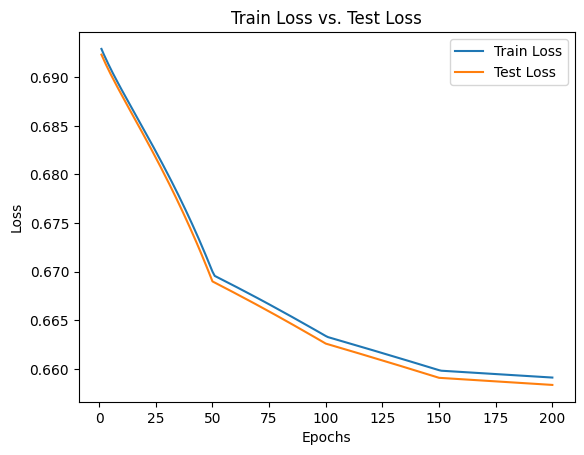

In [114]:
# Plotando o gráfico comparativo
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, label='Train Loss')
plt.plot(epochs, test_loss1, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Adam

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Epoch 1/200
3/3 [==============================] - 1s 75ms/step - loss: 0.6109 - accuracy: 0.5855 - val_loss: 1.4939 - val_accuracy: 0.5978 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 32ms/step - loss: 0.8797 - accuracy: 0.6994 - val_loss: 0.3175 - val_accuracy: 0.9307 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 33ms/step - loss: 0.2686 - accuracy: 0.9512 - val_loss: 0.1735 - val_accuracy: 0.9409 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 33ms/step - loss: 0.1703 - accuracy: 0.9282 - val_loss: 0.1385 - val_accuracy: 0.9382 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 33ms/step - loss: 0.1221 - accuracy: 0.9421 - val_loss: 0.0414 - val_accuracy: 0.9831 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 32ms/step - loss: 0.0448 - accuracy: 0.9830 - val_loss: 0.0580 - val_accuracy: 0.9827 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 0.0392 - a

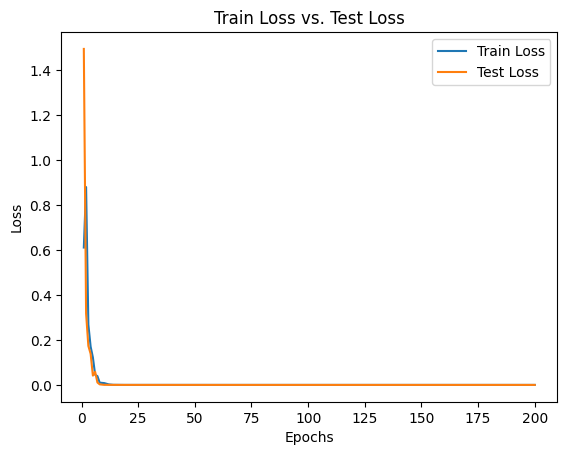

In [115]:
# Crie o modelo sequencial
model2 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model2.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model2.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model2.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss2 = history2.history['loss']
test_loss2 = history2.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss2) + 1)
plt.plot(epochs, train_loss2, label='Train Loss')
plt.plot(epochs, test_loss2, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador RMSprop

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/RMSprop)

Epoch 1/200
3/3 [==============================] - 1s 74ms/step - loss: 0.6780 - accuracy: 0.5415 - val_loss: 39.3897 - val_accuracy: 0.5178 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 31ms/step - loss: 14.6714 - accuracy: 0.5181 - val_loss: 0.4855 - val_accuracy: 0.8929 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 32ms/step - loss: 0.4695 - accuracy: 0.8973 - val_loss: 0.2000 - val_accuracy: 0.9164 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 32ms/step - loss: 0.1858 - accuracy: 0.9269 - val_loss: 0.0835 - val_accuracy: 0.9764 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 31ms/step - loss: 0.0597 - accuracy: 0.9810 - val_loss: 0.0208 - val_accuracy: 0.9951 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 31ms/step - loss: 0.0174 - accuracy: 0.9964 - val_loss: 0.0065 - val_accuracy: 0.9987 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 0.0098 -

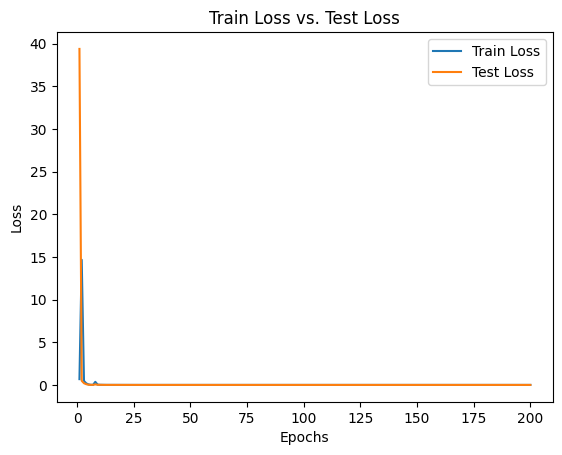

In [116]:
# Crie o modelo sequencial
model3 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model3.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model3.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model3.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model3.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss3 = history3.history['loss']
test_loss3 = history3.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss3) + 1)
plt.plot(epochs, train_loss3, label='Train Loss')
plt.plot(epochs, test_loss3, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Adagrad

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adagrad)

Epoch 1/200
3/3 [==============================] - 1s 76ms/step - loss: 0.6948 - accuracy: 0.4343 - val_loss: 0.6933 - val_accuracy: 0.4827 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 37ms/step - loss: 0.6927 - accuracy: 0.5173 - val_loss: 0.6911 - val_accuracy: 0.6067 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 33ms/step - loss: 0.6906 - accuracy: 0.6389 - val_loss: 0.6890 - val_accuracy: 0.7271 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 32ms/step - loss: 0.6887 - accuracy: 0.7425 - val_loss: 0.6871 - val_accuracy: 0.8093 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 31ms/step - loss: 0.6868 - accuracy: 0.8038 - val_loss: 0.6852 - val_accuracy: 0.8364 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 31ms/step - loss: 0.6851 - accuracy: 0.8322 - val_loss: 0.6835 - val_accuracy: 0.8431 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 0.6834 - a

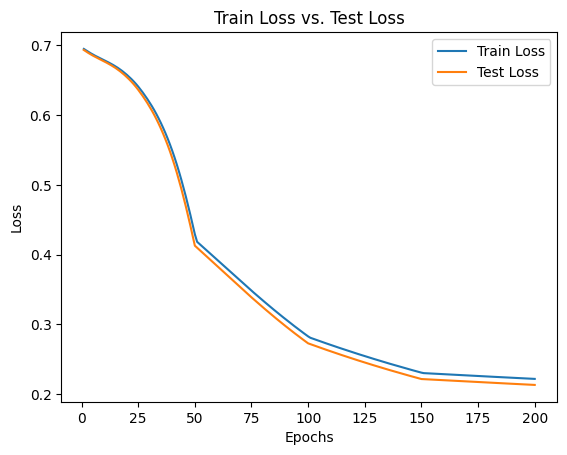

In [117]:
# Crie o modelo sequencial
model4 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model4.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model4.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model4.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model4.compile(optimizer=tf.keras.optimizers.Adagrad(), loss='binary_crossentropy', metrics=['accuracy'])

history4 = model4.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss4 = history4.history['loss']
test_loss4 = history4.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss4) + 1)
plt.plot(epochs, train_loss4, label='Train Loss')
plt.plot(epochs, test_loss4, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: Ada Delta

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Adadelta)

Epoch 1/200
3/3 [==============================] - 1s 195ms/step - loss: 0.6938 - accuracy: 0.4703 - val_loss: 0.6939 - val_accuracy: 0.4760 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 34ms/step - loss: 0.6934 - accuracy: 0.4893 - val_loss: 0.6935 - val_accuracy: 0.4907 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 34ms/step - loss: 0.6930 - accuracy: 0.5034 - val_loss: 0.6931 - val_accuracy: 0.5058 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 33ms/step - loss: 0.6927 - accuracy: 0.5185 - val_loss: 0.6928 - val_accuracy: 0.5213 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 35ms/step - loss: 0.6923 - accuracy: 0.5343 - val_loss: 0.6924 - val_accuracy: 0.5351 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 34ms/step - loss: 0.6920 - accuracy: 0.5510 - val_loss: 0.6920 - val_accuracy: 0.5484 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 34ms/step - loss: 0.6916 - 

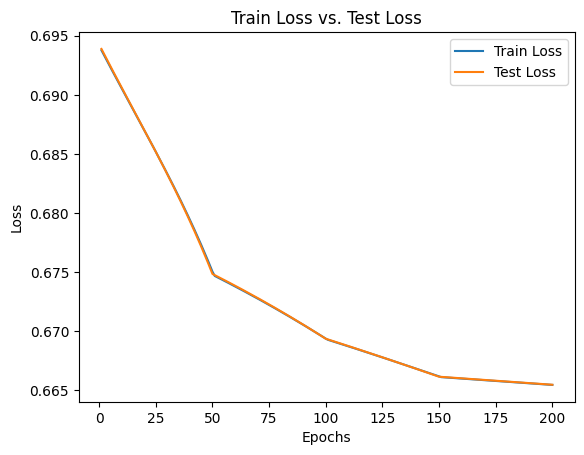

In [118]:
# Crie o modelo sequencial
model5 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model5.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model5.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model5.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model5.compile(optimizer=tf.keras.optimizers.Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

history5 = model5.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss5 = history5.history['loss']
test_loss5 = history5.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss5) + 1)
plt.plot(epochs, train_loss5, label='Train Loss')
plt.plot(epochs, test_loss5, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

### Otimizador: N Adam

[Documentacao](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/experimental/Nadam)

Epoch 1/200
3/3 [==============================] - 1s 78ms/step - loss: 0.6021 - accuracy: 0.6754 - val_loss: 2.7771 - val_accuracy: 0.5178 - lr: 0.0050
Epoch 2/200
3/3 [==============================] - 0s 32ms/step - loss: 1.2671 - accuracy: 0.7745 - val_loss: 0.2007 - val_accuracy: 0.9573 - lr: 0.0050
Epoch 3/200
3/3 [==============================] - 0s 34ms/step - loss: 0.1318 - accuracy: 0.9636 - val_loss: 0.3852 - val_accuracy: 0.9080 - lr: 0.0050
Epoch 4/200
3/3 [==============================] - 0s 34ms/step - loss: 0.1901 - accuracy: 0.9571 - val_loss: 0.0228 - val_accuracy: 0.9987 - lr: 0.0050
Epoch 5/200
3/3 [==============================] - 0s 33ms/step - loss: 0.0177 - accuracy: 0.9979 - val_loss: 0.0034 - val_accuracy: 1.0000 - lr: 0.0050
Epoch 6/200
3/3 [==============================] - 0s 34ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0011 - val_accuracy: 1.0000 - lr: 0.0050
Epoch 7/200
3/3 [==============================] - 0s 32ms/step - loss: 0.0033 - a

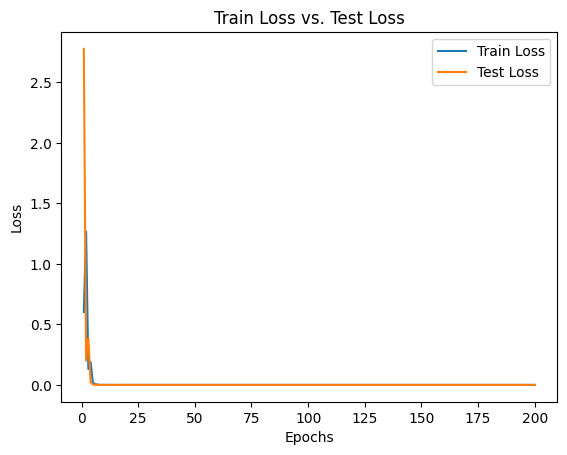

In [119]:
# Crie o modelo sequencial
model6 = tf.keras.models.Sequential() #Definimos que é um modelo de rede neural sequencial

# Adicione a primeira camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #Adicionamos a primeira camada que recebe os inputs e terá 2 neurônios

# Adicione a segunda camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a terceira camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quarta camada oculta
model6.add(tf.keras.layers.Dense(512, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(256, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(128, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a quinta camada oculta
model6.add(tf.keras.layers.Dense(64, activation='relu')) #Adicionamos a segunda camada que terá 2 neurônios

# Adicione a camada de saída
model6.add(tf.keras.layers.Dense(1, activation='sigmoid')) #O valor 1 é porque vamos retornar apenas 1 output nessa camada de saída.

# Compila o modelo
model6.compile(optimizer=tf.keras.optimizers.Nadam(), loss='binary_crossentropy', metrics=['accuracy'])

history6 = model6.fit(X_train.values, np.array(y_train), epochs=200, batch_size=int(0.25*len(X)), verbose=1,
                    callbacks=[early_stopping_callback,lr_scheduler_callback],
                    validation_data=(X_test.values, np.array(y_test))
                    )
# Acessando o histórico de treinamento para visualizar a perda no conjunto de treinamento e no conjunto de teste
train_loss6 = history6.history['loss']
test_loss6 = history6.history['val_loss']

# Plotando o gráfico comparativo
epochs = range(1, len(train_loss6) + 1)
plt.plot(epochs, train_loss6, label='Train Loss')
plt.plot(epochs, test_loss6, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs. Test Loss')
plt.legend()
plt.show()

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
[float(x) for x in model1.predict(X_val)]

20/20 [==============================] - 0s 857us/step


[0.49825072288513184,
 0.4717271327972412,
 0.49294787645339966,
 0.46730369329452515,
 0.5109534859657288,
 0.5224493145942688,
 0.5185530185699463,
 0.46236297488212585,
 0.46926915645599365,
 0.47823283076286316,
 0.5114928483963013,
 0.5207522511482239,
 0.4903004467487335,
 0.4575500786304474,
 0.4728628695011139,
 0.4690154492855072,
 0.46557050943374634,
 0.46853142976760864,
 0.46617770195007324,
 0.4682046175003052,
 0.47351646423339844,
 0.47568055987358093,
 0.5036773681640625,
 0.4649216830730438,
 0.4730863869190216,
 0.4942930340766907,
 0.49367767572402954,
 0.46268215775489807,
 0.4716181755065918,
 0.4563847482204437,
 0.5045773386955261,
 0.5181719660758972,
 0.46835020184516907,
 0.46237748861312866,
 0.47256404161453247,
 0.46000486612319946,
 0.5127208232879639,
 0.46493834257125854,
 0.47097182273864746,
 0.4573431611061096,
 0.477621853351593,
 0.48526519536972046,
 0.49159812927246094,
 0.4622190296649933,
 0.5166730284690857,
 0.4582723379135132,
 0.50200223922

In [122]:
transforma_bin = lambda x: 1 if x > 0.5 else 0

In [123]:
# print('SGD',accuracy_score(y_val, [transforma_bin(float(x)) for x in model1.predict(X_val)]))
# print('Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model2.predict(X_val)]))
# print('RMSProp',accuracy_score(y_val, [transforma_bin(float(x)) for x in model3.predict(X_val)]))
# print('Ada Grad',accuracy_score(y_val, [transforma_bin(float(x)) for x in model4.predict(X_val)]))
# print('Ada Delta',accuracy_score(y_val, [transforma_bin(float(x)) for x in model5.predict(X_val)]))
# print('N Adam',accuracy_score(y_val, [transforma_bin(float(x)) for x in model6.predict(X_val)]))

In [124]:
# print('Adam: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model2.predict(X_test)]))
# print('Adam: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model2.predict(X_train)]))

In [125]:
# print('Ada Delta: validacao',accuracy_score(y_val, [transforma_bin(float(x)) for x in model5.predict(X_val)]))
# print('Ada Delta: teste',accuracy_score(y_test, [transforma_bin(float(x)) for x in model5.predict(X_test)]))
# print('Ada Delta: treino',accuracy_score(y_train, [transforma_bin(float(x)) for x in model5.predict(X_train)]))

In [126]:
#Criando o DataFrame que Irá Armazenar os Resultados
result = pd.DataFrame(index=ID)

In [127]:
len(X_val.columns)

90

In [128]:
len(X_train.columns)

90

In [129]:
y_pred = model1.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_1'] = y_pred

20/20 [==============================] - 0s 908us/step


In [130]:
y_pred = model2.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_2'] = y_pred

20/20 [==============================] - 0s 847us/step


In [131]:
y_pred = model3.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_3'] = y_pred

20/20 [==============================] - 0s 988us/step


In [132]:
y_pred = model4.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_4'] = y_pred

20/20 [==============================] - 0s 861us/step


In [133]:
y_pred = model5.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_5'] = y_pred

20/20 [==============================] - 0s 862us/step


In [134]:
y_pred = model6.predict(np.array(X_val)).flatten()

y_pred = [transforma_bin(float(x)) for x in y_pred]

y_pred = pd.Series(y_pred)

y_pred = y_pred.map({0:'e',1:'p'})

result['CLASS_MODELO_6'] = y_pred

20/20 [==============================] - 0s 902us/step


## Salvando dataframe com predições

In [88]:
result_export = result[['CLASS_MODELO_1', 'CLASS_MODELO_2', 'CLASS_MODELO_3', 'CLASS_MODELO_4', 'CLASS_MODELO_5', 'CLASS_MODELO_6']]

result_export.to_csv('./ARTHUR_VINICIUS_LUCAS_SILVA_SANTOS.csv')